### Temperature Prediction

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

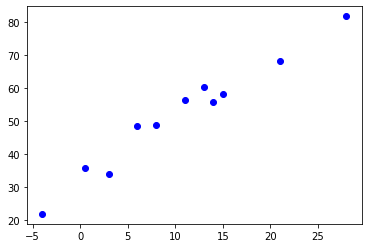

In [5]:
import matplotlib.pyplot as plt
plt.plot(t_u, t_c, 'bo')
plt.show()

Basic model

In [9]:
def model(t_u, w, b):
    return w * t_u + b

In [30]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [20]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [21]:
loss = loss_fn(t_p, t_c)
loss

tensor([1239.0400, 1755.6101, 1866.2401, 2905.2102, 2052.0898, 1672.8102,
         954.8101,  665.6400, 1797.7601, 2246.7603, 2246.7603])

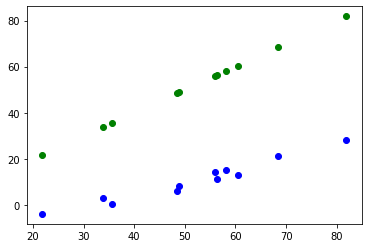

In [22]:
plt.plot(t_u, t_c, 'bo')
plt.plot(t_u, t_p, 'go')
plt.show()

### Gradient Descent

In [25]:
delta = 0.1
learning_rate = 1e-2

# calculate rate of loss change
loss_rate_of_change_w = (loss_fn(model(t_u + delta, w, b), t_c) - loss_fn(model(t_u - delta, w, b), t_c)) / (2.0 * delta)

# adjust weights
w = w - learning_rate * loss_rate_of_change_w

Calculate loss derivatives

d(x^2) / d(x) = 2x

In [27]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)/t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

![d](../resources/derivatives.jpg)

Training Loop

In [32]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_u, w, b) # forward pass
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # backward pass
        params = params - learning_rate * grad
        print('Epoch {}, loss = {}'.format(epoch, float(loss)))
    return params

training_loop(n_epochs=100,
              learning_rate=1e-4,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_u,
              t_c=t_c)

Epoch 1, loss = 1763.884765625
Epoch 2, loss = 323.09051513671875
Epoch 3, loss = 78.92963409423828
Epoch 4, loss = 37.5528450012207
Epoch 5, loss = 30.540283203125
Epoch 6, loss = 29.351154327392578
Epoch 7, loss = 29.148883819580078
Epoch 8, loss = 29.113847732543945
Epoch 9, loss = 29.107145309448242
Epoch 10, loss = 29.105247497558594
Epoch 11, loss = 29.104167938232422
Epoch 12, loss = 29.103221893310547
Epoch 13, loss = 29.102294921875
Epoch 14, loss = 29.10137939453125
Epoch 15, loss = 29.100465774536133
Epoch 16, loss = 29.09954833984375
Epoch 17, loss = 29.098630905151367
Epoch 18, loss = 29.09771728515625
Epoch 19, loss = 29.0967960357666
Epoch 20, loss = 29.09588050842285
Epoch 21, loss = 29.094959259033203
Epoch 22, loss = 29.09404945373535
Epoch 23, loss = 29.0931339263916
Epoch 24, loss = 29.09221649169922
Epoch 25, loss = 29.09130096435547
Epoch 26, loss = 29.09038543701172
Epoch 27, loss = 29.08946418762207
Epoch 28, loss = 29.088550567626953
Epoch 29, loss = 29.0876350

tensor([ 0.2327, -0.0438])

Normalizing Inputs

In [36]:
t_un = 0.1 * t_u

params = training_loop(n_epochs=5000,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_un,
              t_c=t_c)

Epoch 1, loss = 80.36434173583984
Epoch 2, loss = 37.574913024902344
Epoch 3, loss = 30.871076583862305
Epoch 4, loss = 29.756193161010742
Epoch 5, loss = 29.507152557373047
Epoch 6, loss = 29.3924560546875
Epoch 7, loss = 29.298828125
Epoch 8, loss = 29.208717346191406
Epoch 9, loss = 29.119415283203125
Epoch 10, loss = 29.030488967895508
Epoch 11, loss = 28.941877365112305
Epoch 12, loss = 28.853565216064453
Epoch 13, loss = 28.765552520751953
Epoch 14, loss = 28.6778507232666
Epoch 15, loss = 28.590431213378906
Epoch 16, loss = 28.503318786621094
Epoch 17, loss = 28.4164981842041
Epoch 18, loss = 28.329973220825195
Epoch 19, loss = 28.243741989135742
Epoch 20, loss = 28.157804489135742
Epoch 21, loss = 28.07215118408203
Epoch 22, loss = 27.986797332763672
Epoch 23, loss = 27.9017276763916
Epoch 24, loss = 27.81694984436035
Epoch 25, loss = 27.732463836669922
Epoch 26, loss = 27.648256301879883
Epoch 27, loss = 27.56434440612793
Epoch 28, loss = 27.4807071685791
Epoch 29, loss = 27.3

In [37]:
params

tensor([  5.3671, -17.3012])

In [41]:
t_p = model(t_un, *params)

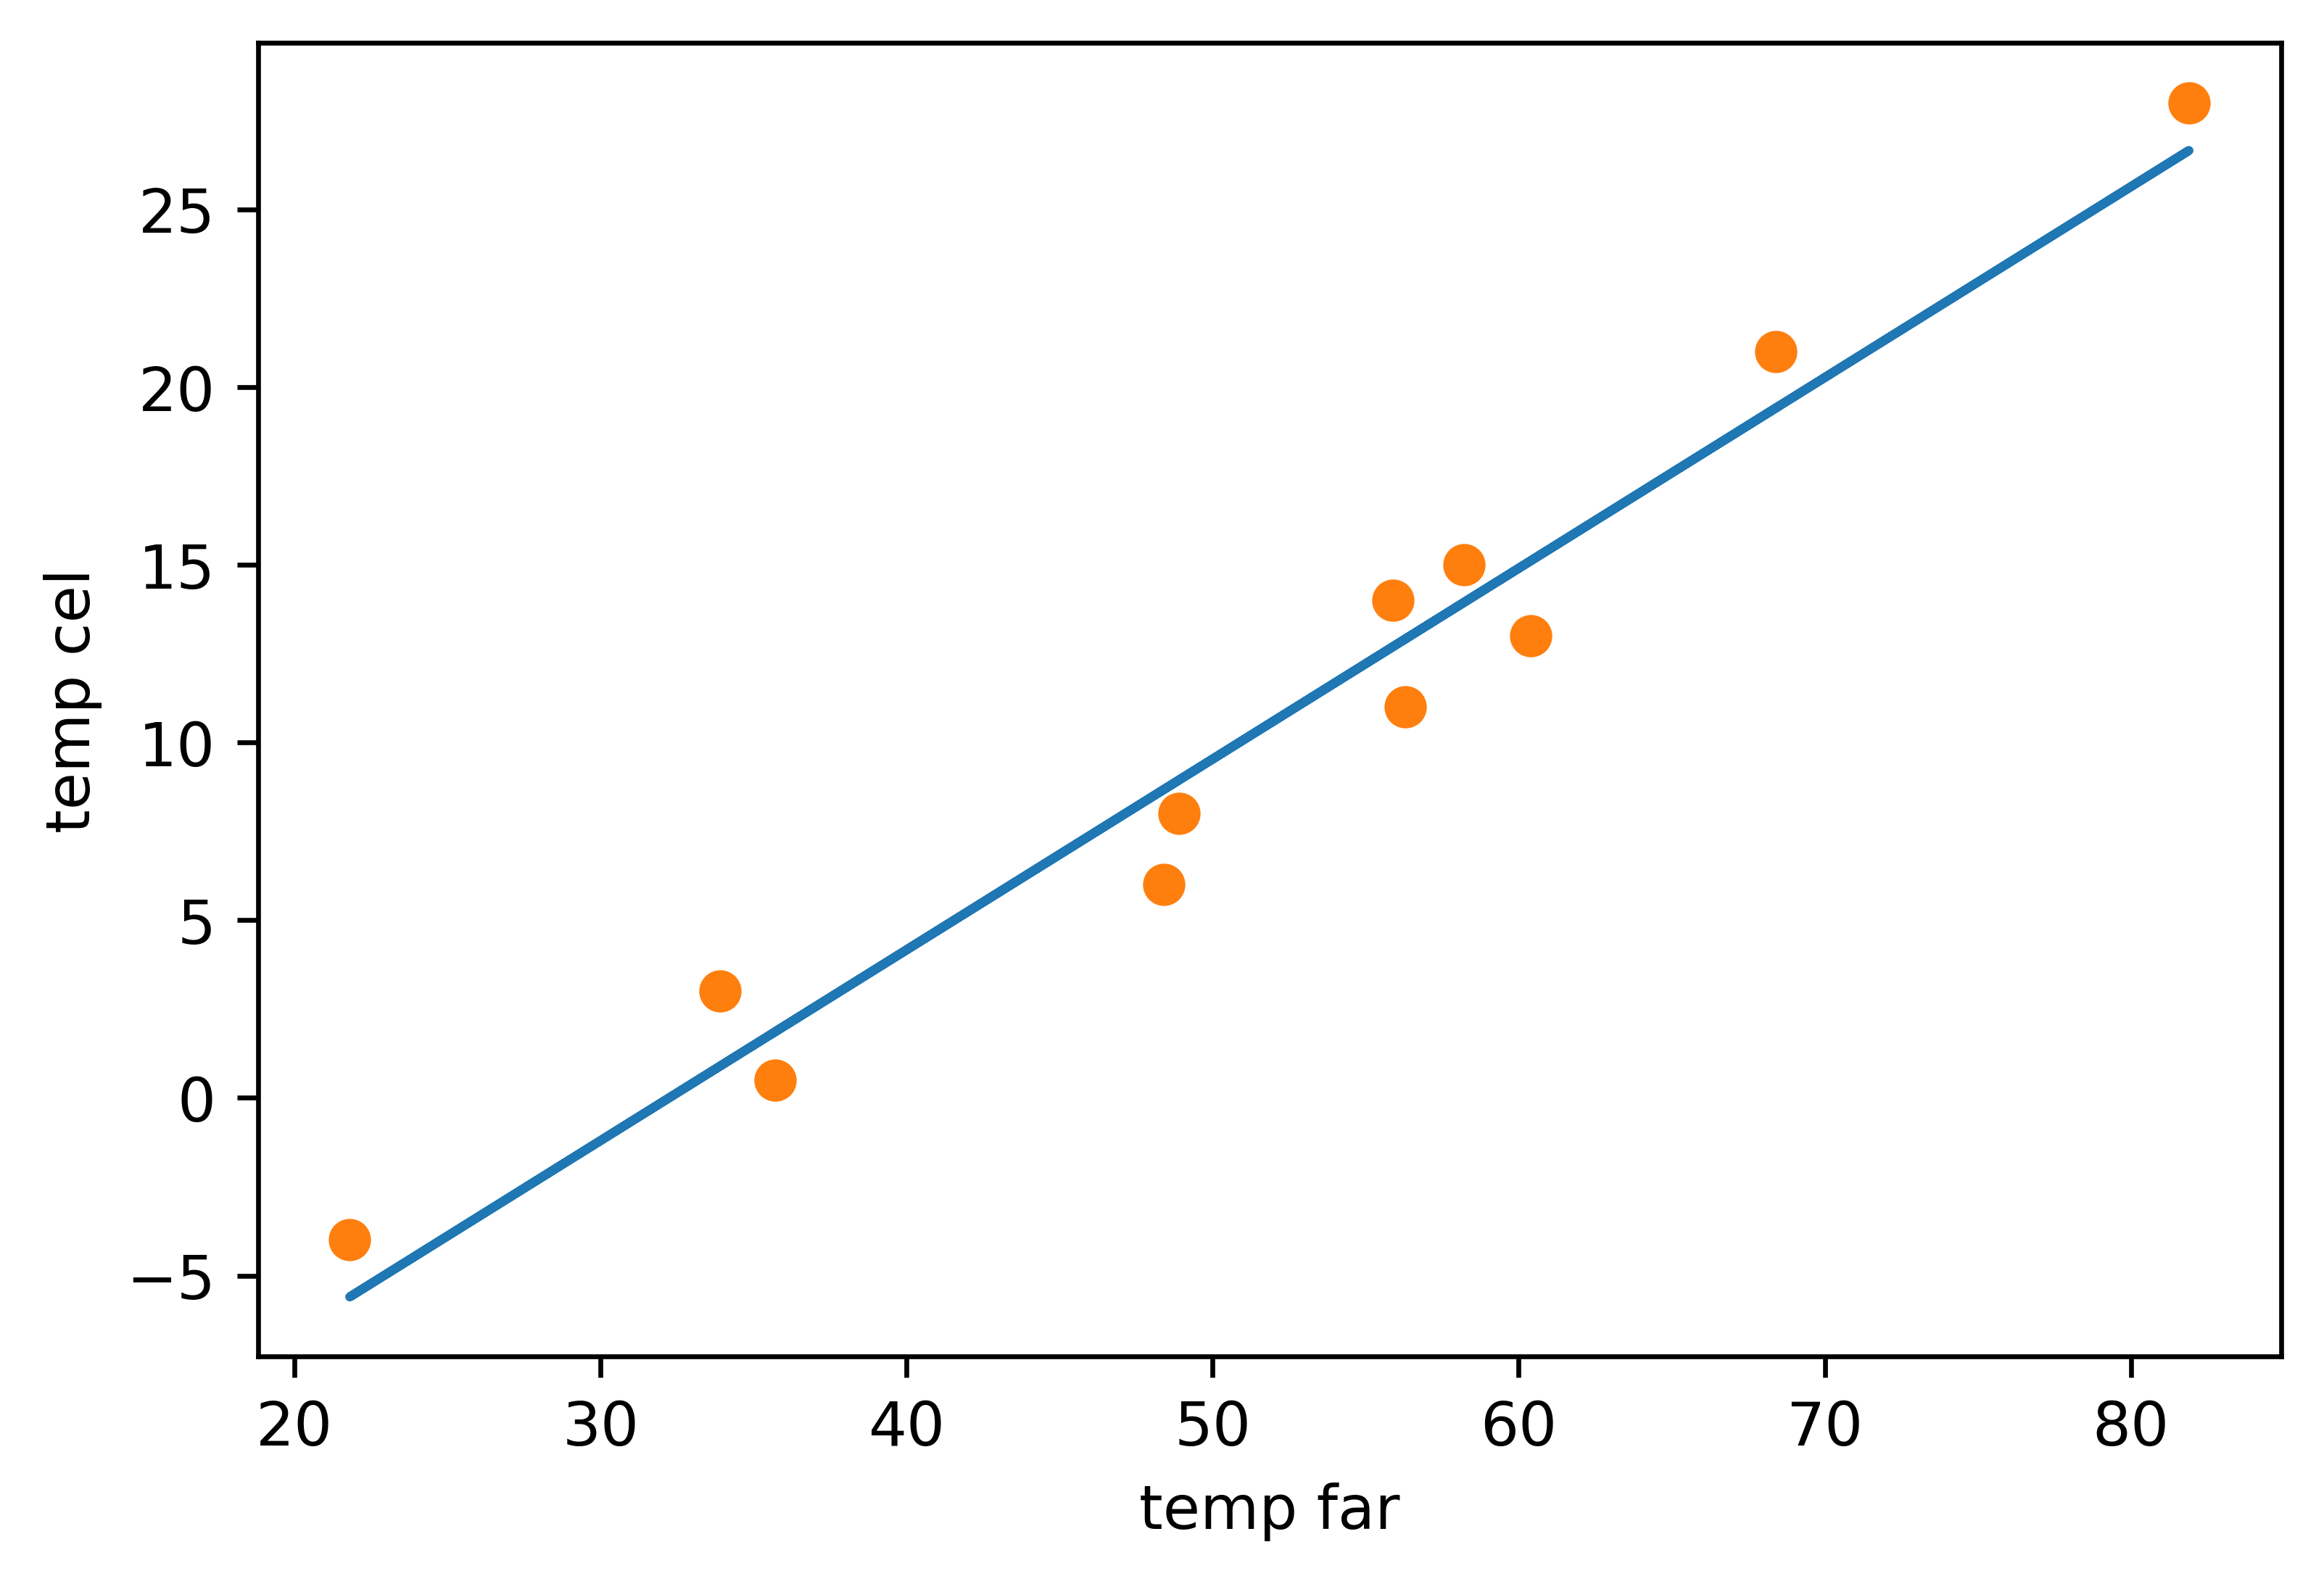

In [42]:
fig = plt.figure(dpi=600)
plt.xlabel("temp far")
plt.ylabel("temp cel")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()
